<a href="https://colab.research.google.com/github/avijit7074/price_prediction_gurgaon/blob/master/Missing_value_imputaion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [2]:
df=pd.read_csv('/content/gurgaon_outlier_treated.csv')

In [3]:
df.head()

,property_type,society,sector,price_in_cr,price_per_sq.ft,total_area,areaWithType,bedrooms,bathrooms,balconies,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study_room,servant_room,store_room,pooja_room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,maa bhagwati residency,sector 3,0.45,5000.0,900.0,Carpet area: 900 (83.61 sq.m.),2.0,2.0,1,4.0,West,Relatively New,NaN,NaN,900.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0,450.0
1,flat,apna enclave,sector 3,0.50,7692.0,650.0,Carpet area: 650 (60.39 sq.m.),2.0,2.0,1,1.0,West,Old Property,NaN,NaN,650.0,0.0,0.0,0.0,0.0,0.0,1.0,37.0,325.0
2,flat,tulsiani easy in homes,sector 35,0.40,6722.0,595.0,Carpet area: 595 (55.28 sq.m.),2.0,2.0,3,12.0,NaN,New Property,NaN,NaN,595.0,0.0,0.0,0.0,0.0,0.0,0.0,36.0,297.5
3,flat,smart world orchard,sector 61,1.47,12250.0,1200.0,Carpet area: 1200 (111.48 sq.m.),2.0,2.0,2,2.0,NaN,Undefined,NaN,NaN,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,76.0,600.0
4,flat,parkwood westend,sector 92,0.70,5204.0,1345.0,Super Built up area 1345(124.95 sq.m.),2.0,2.0,3,5.0,NaN,Under Construction,1345.0,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,672.5


In [4]:
df.isnull().sum()

property_type             0
society                   0
sector                    0
price_in_cr               0
price_per_sq.ft           0
total_area                0
areaWithType              0
bedrooms                  0
bathrooms                 0
balconies                 0
floorNum                 17
facing                 1076
agePossession             0
super_built_up_area    1791
built_up_area          1998
carpet_area            1802
study_room                0
servant_room              0
store_room                0
pooja_room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

**BUILT_UP_AREA**

Text(0.5, 1.0, 'Scatter Plot of Built-up Area vs. Super Built-up Area')

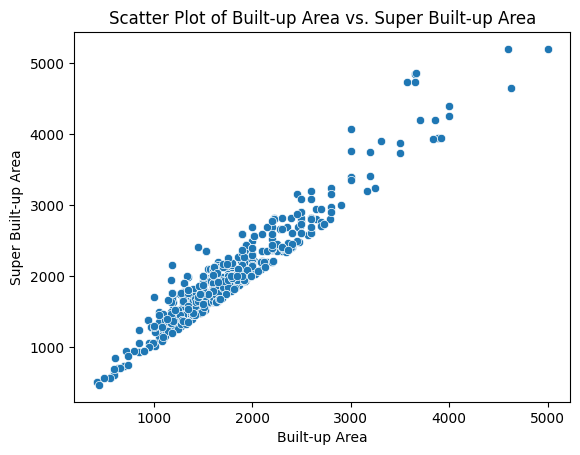

In [5]:
sns.scatterplot(data=df, x='built_up_area', y='super_built_up_area')

# Adding labels and a title
plt.xlabel('Built-up Area')
plt.ylabel('Super Built-up Area')
plt.title('Scatter Plot of Built-up Area vs. Super Built-up Area')

Text(0.5, 1.0, 'Scatter Plot of Built-up Area vs. Carpet Area')

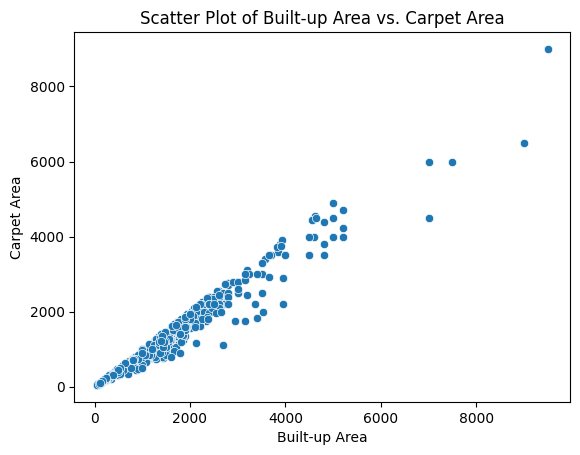

In [6]:
sns.scatterplot(data=df, x='built_up_area', y='carpet_area')

# Adding labels and a title
plt.xlabel('Built-up Area')
plt.ylabel('Carpet Area')
plt.title('Scatter Plot of Built-up Area vs. Carpet Area')

In [7]:
((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())).sum()

0

In [8]:
all_present_df = df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))]

In [9]:
all_present_df.shape

(534, 24)

In [10]:
super_to_built_up_ratio = (all_present_df['super_built_up_area']/all_present_df['built_up_area']).median()
carpet_to_built_up_ratio = (all_present_df['carpet_area']/all_present_df['built_up_area']).median()
print(super_to_built_up_ratio, carpet_to_built_up_ratio)

1.1052289815447711 0.9


In [11]:
# both present built up null
sbc_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]
sbc_df.head()

,property_type,society,sector,price_in_cr,price_per_sq.ft,total_area,areaWithType,bedrooms,bathrooms,balconies,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study_room,servant_room,store_room,pooja_room,others,furnishing_type,luxury_score,area_room_ratio
30,flat,bhawna cghs,sector 43,3.2500,10156.0,3200.0,Super Built up area 3200(297.29 sq.m.)Carpet a...,4.0,4.0,3+,12.0,NaN,Moderately Old,3200.0,NaN,3000.0,0.0,0.0,0.0,1.0,0.0,1.0,119.0,800.000000
35,flat,chintels paradiso,sector 109,1.8000,8866.0,2030.0,Super Built up area 2030(188.59 sq.m.)Carpet a...,3.0,3.0,2,0.0,East,Moderately Old,2030.0,NaN,1785.0,0.0,1.0,0.0,0.0,0.0,0.0,83.0,676.666667
36,flat,breez global hill view,sector 11,0.2999,5403.0,555.0,Super Built up area 655(60.85 sq.m.)Carpet are...,2.0,2.0,2,6.0,North-East,New Property,655.0,NaN,555.0,0.0,0.0,0.0,0.0,0.0,0.0,109.0,277.500000
58,flat,"gokuldham society, bahadurgarh",sector-7,0.5000,5555.0,900.0,Super Built up area 900(83.61 sq.m.)Carpet are...,2.0,2.0,2,2.0,NaN,Moderately Old,900.0,NaN,750.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,450.000000
59,flat,silverglades the melia,sector 35,1.0100,7000.0,1443.0,Super Built up area 1450(134.71 sq.m.)Carpet a...,2.0,2.0,3,12.0,NaN,Undefined,1450.0,NaN,950.0,1.0,0.0,0.0,0.0,0.0,0.0,80.0,721.500000


In [12]:
sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)

<ipython-input-12-a2fefc960aa3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)


In [13]:
df.update(sbc_df)

In [14]:
df.isnull().sum()

property_type             0
society                   0
sector                    0
price_in_cr               0
price_per_sq.ft           0
total_area                0
areaWithType              0
bedrooms                  0
bathrooms                 0
balconies                 0
floorNum                 17
facing                 1076
agePossession             0
super_built_up_area    1791
built_up_area          1574
carpet_area            1802
study_room                0
servant_room              0
store_room                0
pooja_room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [15]:
# sb present c is null built up null
sb_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())]
sb_df.head()

,property_type,society,sector,price_in_cr,price_per_sq.ft,total_area,areaWithType,bedrooms,bathrooms,balconies,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study_room,servant_room,store_room,pooja_room,others,furnishing_type,luxury_score,area_room_ratio
4,flat,parkwood westend,sector 92,0.70,5204.0,1345.0,Super Built up area 1345(124.95 sq.m.),2.0,2.0,3,5.0,NaN,Under Construction,1345.0,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,672.5
6,flat,the cocoon,sector 26,2.00,13333.0,1500.0,Super Built up area 1500(139.35 sq.m.),3.0,3.0,3,5.0,NaN,New Property,1500.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,500.0
13,flat,godrej,sector 33,0.95,6859.0,1385.0,Super Built up area 1385(128.67 sq.m.),2.0,2.0,3+,3.0,South-East,Under Construction,1385.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,692.5
14,flat,shree vardhman flora,sector 90,0.70,5384.0,1300.0,Super Built up area 1300(120.77 sq.m.),2.0,2.0,3,13.0,NaN,New Property,1300.0,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,15.0,650.0
18,flat,central park flower valley,sector 33,2.20,10476.0,2100.0,Super Built up area 2100(195.1 sq.m.),3.0,3.0,3,12.0,North-East,New Property,2100.0,NaN,NaN,0.0,1.0,0.0,0.0,0.0,1.0,49.0,700.0


In [16]:
sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)

<ipython-input-16-554030e2e595>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)


In [17]:
df.update(sb_df)
df.isnull().sum()

property_type             0
society                   0
sector                    0
price_in_cr               0
price_per_sq.ft           0
total_area                0
areaWithType              0
bedrooms                  0
bathrooms                 0
balconies                 0
floorNum                 17
facing                 1076
agePossession             0
super_built_up_area    1791
built_up_area           689
carpet_area            1802
study_room                0
servant_room              0
store_room                0
pooja_room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [18]:
# sb null c is present built up null
c_df = df[(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]
c_df.head()

,property_type,society,sector,price_in_cr,price_per_sq.ft,total_area,areaWithType,bedrooms,bathrooms,balconies,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study_room,servant_room,store_room,pooja_room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,maa bhagwati residency,sector 3,0.45,5000.0,900.0,Carpet area: 900 (83.61 sq.m.),2.0,2.0,1,4.0,West,Relatively New,NaN,NaN,900.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0,450.000000
1,flat,apna enclave,sector 3,0.50,7692.0,650.0,Carpet area: 650 (60.39 sq.m.),2.0,2.0,1,1.0,West,Old Property,NaN,NaN,650.0,0.0,0.0,0.0,0.0,0.0,1.0,37.0,325.000000
2,flat,tulsiani easy in homes,sector 35,0.40,6722.0,595.0,Carpet area: 595 (55.28 sq.m.),2.0,2.0,3,12.0,NaN,New Property,NaN,NaN,595.0,0.0,0.0,0.0,0.0,0.0,0.0,36.0,297.500000
3,flat,smart world orchard,sector 61,1.47,12250.0,1200.0,Carpet area: 1200 (111.48 sq.m.),2.0,2.0,2,2.0,NaN,Undefined,NaN,NaN,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,76.0,600.000000
7,flat,ats triumph,sector 104,1.80,7860.0,2290.0,Carpet area: 2290 (212.75 sq.m.),3.0,4.0,3,14.0,NaN,New Property,NaN,NaN,2290.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,763.333333


In [19]:
c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)

<ipython-input-19-747bc7ee3c0e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)


In [20]:
df.update(c_df)
df.isnull().sum()

property_type             0
society                   0
sector                    0
price_in_cr               0
price_per_sq.ft           0
total_area                0
areaWithType              0
bedrooms                  0
bathrooms                 0
balconies                 0
floorNum                 17
facing                 1076
agePossession             0
super_built_up_area    1791
built_up_area             0
carpet_area            1802
study_room                0
servant_room              0
store_room                0
pooja_room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

<Axes: xlabel='built_up_area', ylabel='price_in_cr'>

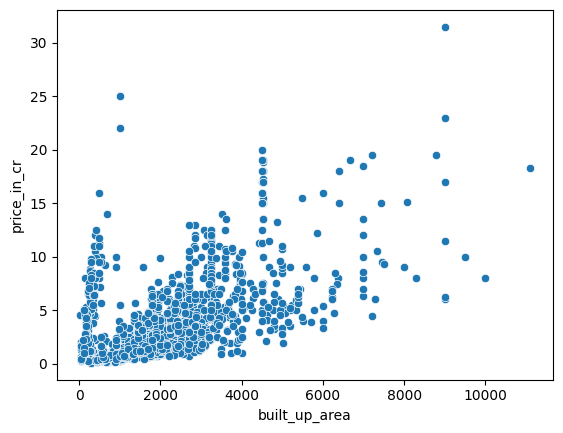

In [21]:
sns.scatterplot(data=df, x='built_up_area',y='price_in_cr')

In [22]:
anamoly_df = df[(df['built_up_area'] < 2000) & (df['price_in_cr'] > 2.5)][['price_in_cr','total_area','built_up_area']]

In [23]:
anamoly_df.sample(5)

,price_in_cr,total_area,built_up_area
1180,2.90,2047.0,1852.0
214,3.67,2040.0,1846.0
1042,2.80,1650.0,1800.0
746,2.55,2273.0,1773.0
1467,4.86,1875.0,1697.0


In [24]:
anamoly_df['built_up_area'] = anamoly_df['total_area']

In [25]:
df.update(anamoly_df)

<Axes: xlabel='built_up_area', ylabel='price_in_cr'>

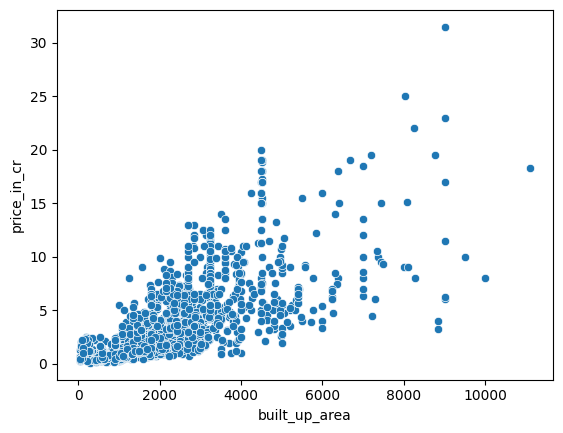

In [26]:
sns.scatterplot(data=df, x='built_up_area',y='price_in_cr')

In [27]:
df.drop(columns=['total_area','areaWithType','super_built_up_area','carpet_area','area_room_ratio'],inplace=True)

In [28]:
df.head()

,property_type,society,sector,price_in_cr,price_per_sq.ft,bedrooms,bathrooms,balconies,floorNum,facing,agePossession,built_up_area,study_room,servant_room,store_room,pooja_room,others,furnishing_type,luxury_score
0,flat,maa bhagwati residency,sector 3,0.45,5000.0,2.0,2.0,1,4.0,West,Relatively New,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0
1,flat,apna enclave,sector 3,0.50,7692.0,2.0,2.0,1,1.0,West,Old Property,722.0,0.0,0.0,0.0,0.0,0.0,1.0,37.0
2,flat,tulsiani easy in homes,sector 35,0.40,6722.0,2.0,2.0,3,12.0,NaN,New Property,661.0,0.0,0.0,0.0,0.0,0.0,0.0,36.0
3,flat,smart world orchard,sector 61,1.47,12250.0,2.0,2.0,2,2.0,NaN,Undefined,1333.0,1.0,0.0,0.0,0.0,0.0,0.0,76.0
4,flat,parkwood westend,sector 92,0.70,5204.0,2.0,2.0,3,5.0,NaN,Under Construction,1217.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
df.isnull().sum()

property_type         0
society               0
sector                0
price_in_cr           0
price_per_sq.ft       0
bedrooms              0
bathrooms             0
balconies             0
floorNum             17
facing             1076
agePossession         0
built_up_area         0
study_room            0
servant_room          0
store_room            0
pooja_room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

**FLOORNUM**

In [30]:
df[df['floorNum'].isnull()]

,property_type,society,sector,price_in_cr,price_per_sq.ft,bedrooms,bathrooms,balconies,floorNum,facing,agePossession,built_up_area,study_room,servant_room,store_room,pooja_room,others,furnishing_type,luxury_score
2866,house,vipul tatvam villa,sector 48,8.50,26235.0,4.0,4.0,2,NaN,East,Moderately Old,3240.0,0.0,1.0,1.0,1.0,0.0,0.0,88.0
2888,house,independent,sector 2,5.60,17284.0,8.0,6.0,3+,NaN,South-West,Moderately Old,3240.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
2958,house,independent,sector 24,1.45,2984.0,3.0,3.0,1,NaN,NaN,Old Property,540.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
3001,house,independent,sector 3,1.50,10288.0,3.0,3.0,No,NaN,NaN,Old Property,210.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3016,house,independent,sector 3,4.12,8889.0,2.0,1.0,3+,NaN,NaN,Moderately Old,4635.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3024,house,independent,sector 110,2.50,5472.0,3.0,2.0,1,NaN,NaN,Old Property,4000.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
3070,house,independent,sector 3,0.65,11111.0,4.0,2.0,2,NaN,NaN,Moderately Old,585.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3092,house,ansal sushant lok plots,sector 43,3.30,26570.0,1.0,1.0,No,NaN,NaN,Under Construction,1242.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3108,house,independent,sector 9,1.10,8148.0,2.0,2.0,1,NaN,NaN,Old Property,150.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3232,house,jacob pura,sector 12,0.35,9722.0,2.0,1.0,No,NaN,NaN,Old Property,360.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
df[df['property_type'] == 'house']['floorNum'].median()

2.0

In [32]:
df['floorNum'].fillna(2.0,inplace=True)

In [33]:
df.isnull().sum()

property_type         0
society               0
sector                0
price_in_cr           0
price_per_sq.ft       0
bedrooms              0
bathrooms             0
balconies             0
floorNum              0
facing             1076
agePossession         0
built_up_area         0
study_room            0
servant_room          0
store_room            0
pooja_room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

In [34]:
1176/df.shape[0]

0.3193049144718979

<Axes: ylabel='facing'>

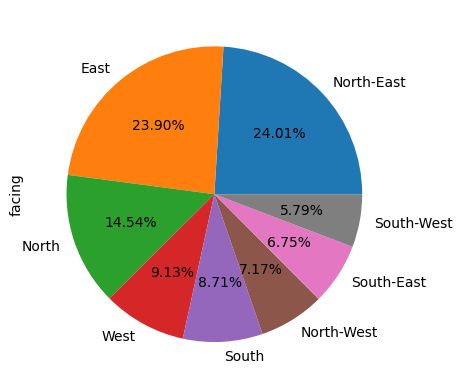

In [35]:
df['facing'].value_counts().plot(kind='pie',autopct='%0.2f%%')

In [36]:
df.drop(columns=['facing'],inplace=True)

In [37]:
df.sample(5)

,property_type,society,sector,price_in_cr,price_per_sq.ft,bedrooms,bathrooms,balconies,floorNum,agePossession,built_up_area,study_room,servant_room,store_room,pooja_room,others,furnishing_type,luxury_score
1411,flat,corona optus,sector 37,1.40,7035.0,3.0,3.0,3+,4.0,Relatively New,1890.0,0.0,1.0,0.0,0.0,0.0,0.0,149.0
2916,house,independent,sector 7,1.55,13889.0,2.0,2.0,2,1.0,Moderately Old,1080.0,0.0,0.0,0.0,0.0,0.0,1.0,52.0
3351,house,dlf city plots phase 4,sector 27,9.54,29444.0,6.0,5.0,3+,3.0,New Property,3240.0,1.0,1.0,1.0,1.0,0.0,0.0,153.0
294,flat,smart world orchard,sector 61,2.30,14110.0,3.0,3.0,2,2.0,Undefined,1475.0,1.0,0.0,0.0,0.0,0.0,0.0,79.0
3466,house,independent,sector 26,20.00,44444.0,5.0,7.0,3+,3.0,Relatively New,4500.0,0.0,1.0,0.0,1.0,0.0,2.0,97.0


In [38]:
df.isnull().sum()

property_type      0
society            0
sector             0
price_in_cr        0
price_per_sq.ft    0
bedrooms           0
bathrooms          0
balconies          0
floorNum           0
agePossession      0
built_up_area      0
study_room         0
servant_room       0
store_room         0
pooja_room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

**AGEPOSSESSION**

In [39]:
df['agePossession'].value_counts()

Relatively New        1626
New Property           571
Moderately Old         571
Undefined              450
Old Property           331
Under Construction     134
Name: agePossession, dtype: int64

In [40]:
df[df['agePossession'] == 'Undefined']

,property_type,society,sector,price_in_cr,price_per_sq.ft,bedrooms,bathrooms,balconies,floorNum,agePossession,built_up_area,study_room,servant_room,store_room,pooja_room,others,furnishing_type,luxury_score
3,flat,smart world orchard,sector 61,1.47,12250.0,2.0,2.0,2,2.0,Undefined,1333.0,1.0,0.0,0.0,0.0,0.0,0.0,76.0
5,flat,signature global infinity mall,sector 36,0.41,6269.0,2.0,2.0,3,3.0,Undefined,654.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,flat,raheja revanta,sector 78,4.75,16885.0,3.0,3.0,2,31.0,Undefined,2813.0,0.0,1.0,0.0,0.0,0.0,0.0,100.0
10,flat,signature global city 81,sector 81,0.96,9767.0,2.0,2.0,2,1.0,Undefined,1194.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0
15,flat,sobha city,sector 108,3.95,16859.0,4.0,5.0,3,25.0,Undefined,2343.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3306,house,independent,sector 108,1.34,5000.0,1.0,1.0,No,1.0,Undefined,2680.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3308,house,independent,sector 39,0.34,7555.0,1.0,1.0,1,1.0,Undefined,450.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3309,house,independent,sector 105,9.90,49500.0,2.0,2.0,2,3.0,Undefined,2000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3310,house,independent,sector 43,2.15,13030.0,1.0,1.0,No,1.0,Undefined,1650.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
def mode_based_imputation(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector']) & (df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0]
        else:
            return np.nan
    else:
        return row['agePossession']

In [42]:
df['agePossession'].mode()

0    Relatively New
Name: agePossession, dtype: object

In [43]:
df['agePossession'] = df.apply(mode_based_imputation,axis=1)

In [44]:
df['agePossession'].value_counts()

Relatively New        1792
New Property           672
Moderately Old         630
Old Property           379
Under Construction     136
Undefined               74
Name: agePossession, dtype: int64

In [45]:
def mode_based_imputation2(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0]
        else:
            return np.nan
    else:
        return row['agePossession']
df['agePossession'] = df.apply(mode_based_imputation2,axis=1)

In [46]:
df['agePossession'].value_counts()

Relatively New        1810
New Property           683
Moderately Old         634
Old Property           379
Under Construction     136
Undefined               41
Name: agePossession, dtype: int64

In [47]:
def mode_based_imputation3(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0]
        else:
            return np.nan
    else:
        return row['agePossession']
df['agePossession'] = df.apply(mode_based_imputation3,axis=1)

In [48]:
df['agePossession'].value_counts()

Relatively New        1833
New Property           683
Moderately Old         652
Old Property           379
Under Construction     136
Name: agePossession, dtype: int64

In [49]:
df.isnull().sum()

property_type      0
society            0
sector             0
price_in_cr        0
price_per_sq.ft    0
bedrooms           0
bathrooms          0
balconies          0
floorNum           0
agePossession      0
built_up_area      0
study_room         0
servant_room       0
store_room         0
pooja_room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [50]:
df.shape

(3683, 18)

In [51]:
df['agePossession'].unique()

array(['Relatively New', 'Old Property', 'New Property',
       'Under Construction', 'Moderately Old'], dtype=object)

In [52]:
df.to_csv('gurgaon_properties_missing_value_imputated_final.csv',index=False)